## Observations and Insights 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.
merged_data["Mouse ID"].count()

1893

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data.duplicated(subset=["Mouse ID", "Timepoint"]).sum()

5

In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(["Mouse ID", "Timepoint"])

In [23]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].count()

1888

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_median = clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_varience = clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_std_dev = clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_sem = clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({
    "Mean": drug_mean,
    "Median": drug_median,
    "Varience": drug_varience,
    "Standard Deviation": drug_std_dev,
    "SEM": drug_sem
})

summary_df

,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

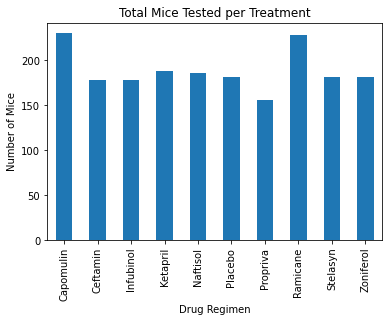

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_data = clean_data.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
bar_plot_data = bar_data.plot.bar(rot="vertical", title="Total Mice Tested per Treatment")

bar_plot_data.set_xlabel("Drug Regimen")
bar_plot_data.set_ylabel("Number of Mice")

Text(0.5, 1.0, 'Total Mice Tested per Treatment')

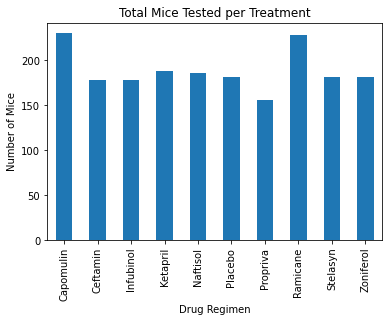

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_data = clean_data.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
barpd_data_df = pd.DataFrame(bar_data)

plt.xdata = barpd_data_df.plot.bar(legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Mice Tested per Treatment")

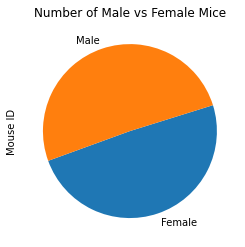

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = clean_data.groupby("Sex").count()["Mouse ID"]
mouse_sex_plot = mouse_sex.plot.pie(y="Sex", title="Number of Male vs Female Mice", startangle=200)

Text(0, 0.5, 'Mouse ID')

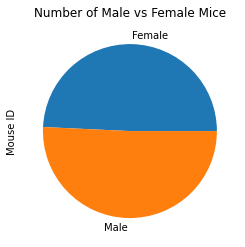

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = clean_data.groupby("Sex").count()["Mouse ID"]
plt.pie(mouse_sex, labels=mouse_sex.index)
plt.title("Number of Male vs Female Mice")
plt.ylabel("Mouse ID")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capo_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
rami_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane",:]
infu_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol",:]
ceft_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
capo_max = capo_df.groupby("Mouse ID").max()["Timepoint"]
capo_max_df = pd.DataFrame(capo_max)
capo_max_merge = pd.merge(capo_max_df, clean_data, on=("Mouse ID", "Timepoint"), how="left")

rami_max = rami_df.groupby("Mouse ID").max()["Timepoint"]
rami_max_df = pd.DataFrame(rami_max)
rami_max_merge = pd.merge(rami_max_df, clean_data, on=("Mouse ID", "Timepoint"), how="left")

infu_max = infu_df.groupby("Mouse ID").max()["Timepoint"]
infu_max_df = pd.DataFrame(infu_max)
infu_max_merge = pd.merge(infu_max_df, clean_data, on=("Mouse ID", "Timepoint"), how="left")

ceft_max = ceft_df.groupby("Mouse ID").max()["Timepoint"]
ceft_max_df = pd.DataFrame(ceft_max)
ceft_max_merge = pd.merge(ceft_max_df, clean_data, on=("Mouse ID", "Timepoint"), how="left")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [13]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_tumors = capo_max_merge["Tumor Volume (mm3)"]
capo_quartiles = capo_tumors.quantile([.25,.5,.75])
capo_lowerq = capo_quartiles[.25]
capo_upperq = capo_quartiles[.75]
capo_iqr = capo_upperq - capo_lowerq
capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)
print(f"Capomulin potential outliers could be values below {capo_lower_bound} and above {capo_upper_bound} could be outliers.")

rami_tumors = rami_max_merge["Tumor Volume (mm3)"]
rami_quartiles = rami_tumors.quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[.25]
rami_upperq = rami_quartiles[.75]
rami_iqr = rami_upperq - rami_lowerq
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)
print(f"Ramicane potential outliers could be values below {rami_lower_bound} and above {rami_upper_bound} could be outliers.")

infu_tumors = infu_max_merge["Tumor Volume (mm3)"]
infu_quartiles = infu_tumors.quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[.25]
infu_upperq = infu_quartiles[.75]
infu_iqr = infu_upperq - infu_lowerq
infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)
print(f"Infubinol potential outliers could be values below {infu_lower_bound} and above {infu_upper_bound} could be outliers.")

ceft_tumors = ceft_max_merge["Tumor Volume (mm3)"]
ceft_quartiles = ceft_tumors.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[.25]
ceft_upperq = ceft_quartiles[.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Ceftamin potential outliers could be values below {ceft_lower_bound} and above {ceft_upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


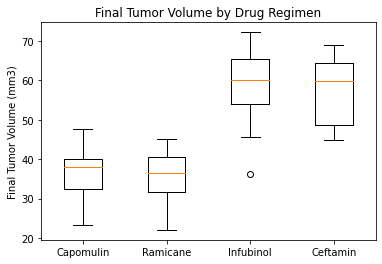

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fix1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")

box_plot_data = [capo_tumors, rami_tumors, infu_tumors, ceft_tumors]
plt.boxplot(box_plot_data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

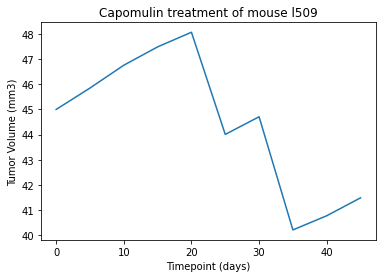

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_l509 = capo_df.loc[capo_df["Mouse ID"] == "l509",:]

x_axis = mouse_l509["Timepoint"]
y_axis = mouse_l509["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

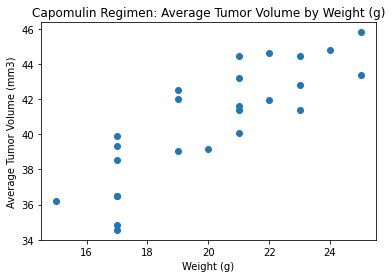

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_df_mean = capo_df.groupby(["Mouse ID"]).mean()
plt.scatter(capo_df_mean["Weight (g)"],capo_df_mean["Tumor Volume (mm3)"])
plt.title("Capomulin Regimen: Average Tumor Volume by Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

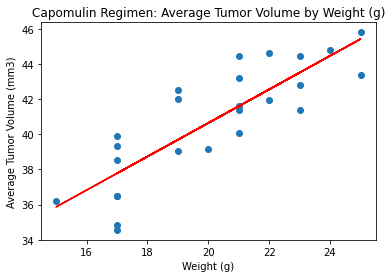

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_df_mean = capo_df.groupby(["Mouse ID"]).mean()
plt.scatter(capo_df_mean["Weight (g)"],capo_df_mean["Tumor Volume (mm3)"])
plt.title("Capomulin Regimen: Average Tumor Volume by Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

lin_reg = st.linregress(capo_df_mean["Weight (g)"], capo_df_mean["Tumor Volume (mm3)"])
lin_slope = 0.9544396890241045
lin_intercept = 21.552160532685015
y_values = capo_df_mean["Weight (g)"]*lin_slope+lin_intercept
plt.plot(capo_df_mean["Weight (g)"], y_values, color="red")